# OBTAIN


## Imports

In [1]:
import pandas as pd

import os

import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import requests

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#from sklearn.tree import DecisionTreeClassifier 
#from sklearn.metrics import accuracy_score, plot_confusion_matrix
#from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
#from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
#from sklearn.metrics import accuracy_score, roc_curve, auc
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#from imblearn.over_sampling import SMOTE

## PFF (ProFootball Focus)

In [3]:
pwd

'/Users/jlemaster/mod6_capstone'

In [4]:
ls


Untitled.ipynb               pff_stas_rr_2019.csv
allpff.csv                   pff_stats_rr_2017.csv
fantasyfootball-Copy1.ipynb  pff_stats_rr_2018.csv
fantasyfootball.ipynb        players_sportsio.json
footballoutsiders2019.csv


In [5]:
# Set Max Display..showing all columns
pd.set_option("display.max_columns", 0)

### DFF 2019

In [6]:
df_pff2019 = pd.read_csv('pff_stas_rr_2019.csv')
df_pff2019['year']=2019
df_pff2019.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Brandon Zylstra,CAR,7,WR,12,8,1,106,0,0,0,1,66.7,13.50,8.83,13.25,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,14.6,0.21,1.82,2019
1,Alexander Hollins,MIN,5,WR,4,2,0,46,0,0,0,1,50.0,19.00,11.50,23.00,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,5.6,0.08,2.80,2019
2,Darious Williams,LA,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2019
3,Keelan Cole,JAX,16,WR,36,24,2,361,0,3,0,1,66.7,12.08,10.03,15.04,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,0,0,6.0,5.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,66.7,0.18,2.67,2019
4,Gary Jennings,MIA,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2019


### DFF 2018

In [7]:
df_pff2018 = pd.read_csv('pff_stats_rr_2018.csv')
df_pff2018['year']=2018
df_pff2018.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,17.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,74.1,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.00,0.00,0,0.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,7.6,0.25,2.53,2018
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,172,0,0,0,13.23,7.77,6,0.46,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,134.3,0.18,2.00,2018
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,24,0,0,0,4.80,3.00,1,0.20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,176.5,0.27,2.56,2018


In [8]:
ls

Untitled.ipynb               pff_stas_rr_2019.csv
allpff.csv                   pff_stats_rr_2017.csv
fantasyfootball-Copy1.ipynb  pff_stats_rr_2018.csv
fantasyfootball.ipynb        players_sportsio.json
footballoutsiders2019.csv


### DFF 2017

In [9]:
df_pff2017 = pd.read_csv('pff_stats_rr_2017.csv')
df_pff2017['year']=2017
df_pff2017.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rzRecTarg,rzRecRec,rzRecTds,rzRecTargPct,rzRecRecPct,rzRecTdPct,ezRecTarg,ezRecTds,ezRecTargPct,ezRecRecPct,ezRecTdPct,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fumbles,rzRushCarries,rzRushTds,rzRushPct,rzRushTdPct,i5RushCarries,i5RushTds,i5RushPct,i5RushTdPct,patConversions,patAttempts,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Isaac Whitney,OAK,2,WR,1,0,0,0,0,0,0,0,0.0,52.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.00,NaN,2017
1,Tanner Gentry,CHI,4,WR,5,3,0,35,0,0,0,1,60.0,10.80,7.00,11.67,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5.0,0.03,1.67,2017
2,Bug Howard,CLV,0,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,2017
3,Michael Clark,GB,2,WR,14,4,0,41,0,0,0,1,28.6,16.71,2.93,10.25,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6.1,0.08,1.52,2017
4,C.J. Board,CLV,0,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,2017


## Football Outsiders (FO)

### Web Scraping (WS)

### WS Imports

In [10]:
from bs4 import BeautifulSoup
import requests
import re

### FO HTML

In [11]:
# A get request to retrieve the page
html_page = requests.get('https://www.footballoutsiders.com/stats/nfl/team-offense/2019')

# Pass the page contents to BeautifulSoup for parsing
soup = BeautifulSoup(html_page.content, 'html.parser') 

In [12]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"99579933b3",applicationID:"172747594"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(f(arguments)),n?null:this,t),n?void 0:this}}var o=e("handle"),a=e(4),f=e(5),c=e("ee").get("tracer"),u=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],l="api-",d=l+"ixn-";a(p,function(e,n){s[n]=i(l+n,!0,"

### HTML Table from FO

In [13]:
table = soup.find_all('table')

In [14]:
table

[<table border="2" cellpadding="3" cellspacing="0" class="sticky-headers sortable stats">
 <th><b>RK</b></th>
 <th align="center">
 <b>TEAM</b>
 </th>
 <th align="center">
 <b>OFFENSE<br/>DVOA</b>
 </th>
 <th align="center">
 <b>LAST<br/>YEAR</b>
 </th>
 <th align="center" bgcolor="#CCCCCC">
 <font color="#0000FF"><b>WEI.<br/>OFFENSE</b></font></th>
 <th align="center" bgcolor="#CCCCCC">
 <font color="#0000FF"><b>RK</b></font></th>
 <th align="center">
 <b>PASS<br/>OFF</b>
 </th>
 <th align="center">
 <b>RK</b>
 </th>
 <th align="center">
 <b>RUSH<br/>OFF</b>
 </th>
 <th align="center">
 <b>RK</b>
 </th>
 <th align="center" bgcolor="#CCCCCC">
 <b>NON-ADJ<br/>TOTAL</b></th>
 <th align="center" bgcolor="#CCCCCC">
 <b>NON-ADJ<br/>PASS</b></th>
 <th align="center" bgcolor="#CCCCCC">
 <b>NON-ADJ<br/>RUSH</b></th>
 <th align="center">
 <b>VAR</b>
 </th>
 <th align="center">
 <b>RK</b>
 </th>
 <th align="center">
 <b>SCHED</b>
 </th>
 <th align="center">
 <b>RK</b>
 </th>
 <tr>
 <td>1</td>
 <

### Searching to Find Data

In [15]:
header = soup.find_all('th')
header[0].text

'RK'

In [16]:
headers = [tag.text.replace('\n', '') for tag in header]
headers

['RK',
 'TEAM',
 'OFFENSEDVOA',
 'LASTYEAR',
 'WEI.OFFENSE',
 'RK',
 'PASSOFF',
 'RK',
 'RUSHOFF',
 'RK',
 'NON-ADJTOTAL',
 'NON-ADJPASS',
 'NON-ADJRUSH',
 'VAR',
 'RK',
 'SCHED',
 'RK']

In [17]:
len(headers)

17

In [18]:
rows = table[0].find_all('tr')

### Found the Data

In [19]:
# FOUND THE DATA IN THE TABLE!!!
rows[10].text

'\n11\nNE\n4.1%\n5\n-0.6%\n15\n14.9%\n14\n-2.9%\n16\n5.9%\n18.3%\n-2.8%\n6.2%\n9\n1.4%\n24\n'

In [20]:
test_row = rows[10].text
split_row = test_row.split('\n')

split_row[1:-2]

['11',
 'NE',
 '4.1%',
 '5',
 '-0.6%',
 '15',
 '14.9%',
 '14',
 '-2.9%',
 '16',
 '5.9%',
 '18.3%',
 '-2.8%',
 '6.2%',
 '9',
 '1.4%']

In [21]:
len(split_row)

19

In [22]:
header_row = rows[0].text
split_header_row = header_row.split('\n')

In [23]:
display(split_header_row)

['',
 '1',
 'BAL',
 '27.5%',
 '15',
 '31.8%',
 '1',
 '47.4%',
 '1',
 '21.1%',
 '1',
 '27.6%',
 '48.4%',
 '20.5%',
 '7.4%',
 '18',
 '-1.8%',
 '7',
 '']

In [24]:
headers, len(headers)

(['RK',
  'TEAM',
  'OFFENSEDVOA',
  'LASTYEAR',
  'WEI.OFFENSE',
  'RK',
  'PASSOFF',
  'RK',
  'RUSHOFF',
  'RK',
  'NON-ADJTOTAL',
  'NON-ADJPASS',
  'NON-ADJRUSH',
  'VAR',
  'RK',
  'SCHED',
  'RK'],
 17)

In [25]:
full_table = [headers]
for row in rows:
    test_row = row.text
    split_row = test_row.split('\n')
    cut_row = split_row[1:-1]

    full_table.append(cut_row)
    
full_table

[['RK',
  'TEAM',
  'OFFENSEDVOA',
  'LASTYEAR',
  'WEI.OFFENSE',
  'RK',
  'PASSOFF',
  'RK',
  'RUSHOFF',
  'RK',
  'NON-ADJTOTAL',
  'NON-ADJPASS',
  'NON-ADJRUSH',
  'VAR',
  'RK',
  'SCHED',
  'RK'],
 ['1',
  'BAL',
  '27.5%',
  '15',
  '31.8%',
  '1',
  '47.4%',
  '1',
  '21.1%',
  '1',
  '27.6%',
  '48.4%',
  '20.5%',
  '7.4%',
  '18',
  '-1.8%',
  '7'],
 ['2',
  'DAL',
  '24.0%',
  '24',
  '21.2%',
  '4',
  '39.3%',
  '5',
  '8.7%',
  '3',
  '24.2%',
  '41.0%',
  '6.9%',
  '3.8%',
  '2',
  '-0.6%',
  '15'],
 ['3',
  'KC',
  '22.7%',
  '1',
  '20.8%',
  '5',
  '43.7%',
  '2',
  '-1.4%',
  '14',
  '22.8%',
  '42.8%',
  '0.2%',
  '4.7%',
  '6',
  '0.7%',
  '21'],
 ['4',
  'NO',
  '21.3%',
  '4',
  '27.8%',
  '2',
  '43.7%',
  '3',
  '-0.1%',
  '12',
  '22.3%',
  '45.3%',
  '0.1%',
  '7.5%',
  '19',
  '0.3%',
  '18'],
 ['5',
  'SEA',
  '17.4%',
  '9',
  '11.8%',
  '6',
  '43.6%',
  '4',
  '2.7%',
  '6',
  '11.3%',
  '36.3%',
  '-2.4%',
  '10.1%',
  '27',
  '-4.2%',
  '3'],
 ['6',
 

In [26]:
df_FO = pd.DataFrame(full_table[1:], columns=full_table[0])
df_FO.drop(columns=['LASTYEAR', 'RK'], inplace=True)
df_FO.head(3)


,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,BAL,27.5%,31.8%,47.4%,21.1%,27.6%,48.4%,20.5%,7.4%,-1.8%
1,DAL,24.0%,21.2%,39.3%,8.7%,24.2%,41.0%,6.9%,3.8%,-0.6%
2,KC,22.7%,20.8%,43.7%,-1.4%,22.8%,42.8%,0.2%,4.7%,0.7%


In [27]:
num_cols = list(df_FO.drop(['TEAM'], axis=1).columns)

num_cols

['OFFENSEDVOA',
 'WEI.OFFENSE',
 'PASSOFF',
 'RUSHOFF',
 'NON-ADJTOTAL',
 'NON-ADJPASS',
 'NON-ADJRUSH',
 'VAR',
 'SCHED']

In [28]:
#Remove %
#df_FO['OFFENSEDVOA'].str.replace('%', '')

In [29]:
df_FO.dtypes

TEAM            object
OFFENSEDVOA     object
WEI.OFFENSE     object
PASSOFF         object
RUSHOFF         object
NON-ADJTOTAL    object
NON-ADJPASS     object
NON-ADJRUSH     object
VAR             object
SCHED           object
dtype: object

### Final FO DataFrame

In [30]:
for col in num_cols:
    temp = df_FO[col]
    temp = temp.str.replace('%', '') # get rid of percentage syymbol
    change_col = pd.to_numeric(temp) 
    df_FO[col] = change_col # 
    
df_FO 

,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,BAL,27.5,31.8,47.4,21.1,27.6,48.4,20.5,7.4,-1.8
1,DAL,24.0,21.2,39.3,8.7,24.2,41.0,6.9,3.8,-0.6
2,KC,22.7,20.8,43.7,-1.4,22.8,42.8,0.2,4.7,0.7
3,NO,21.3,27.8,43.7,-0.1,22.3,45.3,0.1,7.5,0.3
4,SEA,17.4,11.8,43.6,2.7,11.3,36.3,-2.4,10.1,-4.2
5,TEN,12.9,24.7,29.6,7.9,16.9,34.5,11.1,13.9,3.1
6,SF,7.2,4.4,24.4,-0.5,7.0,24.0,-0.6,6.8,-0.1
7,GB,6.5,4.1,17.1,8.3,5.5,15.1,8.9,6.9,0.4
8,OAK,5.6,3.1,24.9,-7.3,6.1,25.6,-7.1,8.4,1.2
9,MIN,4.6,2.7,18.2,-1.8,6.7,22.1,-1.5,5.9,2.6


In [31]:
df_FO.dtypes

TEAM             object
OFFENSEDVOA     float64
WEI.OFFENSE     float64
PASSOFF         float64
RUSHOFF         float64
NON-ADJTOTAL    float64
NON-ADJPASS     float64
NON-ADJRUSH     float64
VAR             float64
SCHED           float64
dtype: object

In [32]:
#Save to CSV
df_FO.to_csv('footballoutsiders2019.csv')

# SCRUB/EXPLORE

## PFF

### PFF Key / Abbreviations


* ATT: Rush Attempts
* ATT 40+: Rush Attempts over 40 yards
* YDS/ATT: Yards per Rush Attempt
* YCO/ATT: Yards After Contact per Rush Attempt
* AVT: Tackles Avoided
* AVT/ATT: Tackles Avoided per Attempt
* #G 100+: Number of games over 100 rushing/receiving yards

* TGT: Targets
* CTH%: Catch Percentage
* DRP: Drops
* ADOT: Average Depth of Target
* YDS/TGT: Yards per Target
* YDS/REC: Yards per Reception
* YAC/REC: Receiving Yards After Catch per reception

* Pts: Fantasy Points
* Pts/DB:  Fantasy Points Per Drop Back
* Pts/Snap:  Fantasy Points Per Snap
* Pts/Touch:  Fantasy Points Per Touch (rushes + receptions)

### Concat PFF (df_all_pff)

In [33]:
df_all_pff = df_pff2018.copy()
df_all_pff['fantasyPts'] = df_pff2019['fantasyPts'].copy()

In [34]:
#df_all_pff = pd.concat([df_pff2019, df_pff2018, df_pff2017], axis=0)
#df_all_pff.head(3)

### Cols, NaNs & dtypes

In [35]:
df_all_pff.columns

Index(['player', 'team', 'games', 'position', 'recTarg', 'recRec', 'recRec40s',
       'recYds', 'recYds100Games', 'recTds', 'recTd40s', 'recDrops', 'catch',
       'depth', 'ypt', 'ypr', 'rac', 'rzRecTarg', 'rzRecRec', 'rzRecTds',
       'rzRecTargPct', 'rzRecRecPct', 'rzRecTdPct', 'ezRecTarg', 'ezRecTds',
       'ezRecTargPct', 'ezRecRecPct', 'ezRecTdPct', 'rushCarries', 'rush40s',
       'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc', 'yac',
       'rushTa', 'tat', 'fumbles', 'rzRushCarries', 'rzRushTds', 'rzRushPct',
       'rzRushTdPct', 'i5RushCarries', 'i5RushTds', 'i5RushPct', 'i5RushTdPct',
       'patConversions', 'patAttempts', 'fantasyPts', 'ptsPerSnap',
       'ptsPerTouch', 'year'],
      dtype='object')

In [36]:
df_all_pff.drop(['patConversions', 'patAttempts', 'fumbles'], axis=1, inplace=True)

In [37]:
df_all_pff.columns

Index(['player', 'team', 'games', 'position', 'recTarg', 'recRec', 'recRec40s',
       'recYds', 'recYds100Games', 'recTds', 'recTd40s', 'recDrops', 'catch',
       'depth', 'ypt', 'ypr', 'rac', 'rzRecTarg', 'rzRecRec', 'rzRecTds',
       'rzRecTargPct', 'rzRecRecPct', 'rzRecTdPct', 'ezRecTarg', 'ezRecTds',
       'ezRecTargPct', 'ezRecRecPct', 'ezRecTdPct', 'rushCarries', 'rush40s',
       'rushYds', 'rushYds100Games', 'rushTds', 'rushTd40s', 'ypc', 'yac',
       'rushTa', 'tat', 'rzRushCarries', 'rzRushTds', 'rzRushPct',
       'rzRushTdPct', 'i5RushCarries', 'i5RushTds', 'i5RushPct', 'i5RushTdPct',
       'fantasyPts', 'ptsPerSnap', 'ptsPerTouch', 'year'],
      dtype='object')

### Drop NaNs

In [38]:
df_all_pff.dropna(axis=1, how='all', inplace=True)
df_all_pff.head(3)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,tat,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.0,0.0,0,0.0,14.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.0,0.0,0,0.0,5.6,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.25,2.53,2018


In [39]:
df_all_pff.isnull().sum()

player              0
team                0
games               0
position            0
recTarg             0
recRec              0
recRec40s           0
recYds              0
recYds100Games      0
recTds              0
recTd40s            0
recDrops            0
catch               0
depth               0
ypt                 0
ypr                 0
rac                 0
rushCarries         0
rush40s             0
rushYds             0
rushYds100Games     0
rushTds             0
rushTd40s           0
ypc                 0
yac                 0
rushTa              0
tat                 0
fantasyPts          0
ptsPerSnap          2
ptsPerTouch        62
year                0
dtype: int64

In [40]:
df_all_pff.drop(['tat'], axis=1, inplace=True)

In [41]:
df_all_pff.isnull().sum().divide(len(df_all_pff))

player             0.000000
team               0.000000
games              0.000000
position           0.000000
recTarg            0.000000
recRec             0.000000
recRec40s          0.000000
recYds             0.000000
recYds100Games     0.000000
recTds             0.000000
recTd40s           0.000000
recDrops           0.000000
catch              0.000000
depth              0.000000
ypt                0.000000
ypr                0.000000
rac                0.000000
rushCarries        0.000000
rush40s            0.000000
rushYds            0.000000
rushYds100Games    0.000000
rushTds            0.000000
rushTd40s          0.000000
ypc                0.000000
yac                0.000000
rushTa             0.000000
fantasyPts         0.000000
ptsPerSnap         0.003650
ptsPerTouch        0.113139
year               0.000000
dtype: float64

 0.00    61
 0.10    24
 0.08    22
 0.15    22
 0.17    19
 0.13    19
 0.12    18
 0.07    18
 0.16    18
 0.11    17
 0.03    16
 0.05    15
 0.09    15
 0.14    15
 0.18    14
 0.04    14
 0.19    13
 0.22    13
 0.25    12
 0.21    12
 0.26    12
 0.06    11
 0.02    11
 0.30    10
 0.24    10
 0.28    10
 0.23     9
 0.20     9
 0.27     8
 0.31     8
 0.43     7
 0.33     7
 0.36     6
 0.38     5
 0.35     5
 0.01     5
 0.29     5
 0.34     5
 0.39     4
 0.47     3
 0.45     2
 0.40     2
 0.42     2
 0.41     2
 1.20     1
 0.70     1
 2.03     1
 0.49     1
 0.37     1
 0.85     1
-0.05     1
 0.32     1
 1.15     1
 0.95     1
 0.63     1
Name: ptsPerSnap, dtype: int64

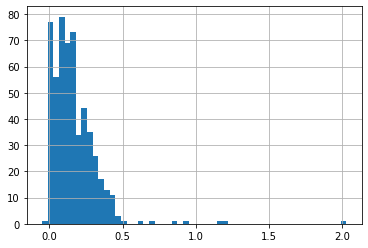

In [42]:
df_all_pff['ptsPerSnap'].hist(bins='auto')
df_all_pff['ptsPerSnap'].value_counts()

In [43]:
df_all_pff.dropna(subset=['ptsPerSnap'], inplace=True)

In [44]:
df_all_pff.isna().sum()

player              0
team                0
games               0
position            0
recTarg             0
recRec              0
recRec40s           0
recYds              0
recYds100Games      0
recTds              0
recTd40s            0
recDrops            0
catch               0
depth               0
ypt                 0
ypr                 0
rac                 0
rushCarries         0
rush40s             0
rushYds             0
rushYds100Games     0
rushTds             0
rushTd40s           0
ypc                 0
yac                 0
rushTa              0
fantasyPts          0
ptsPerSnap          0
ptsPerTouch        60
year                0
dtype: int64

-1.10    1
 0.00    1
 0.15    1
 0.20    2
 0.23    1
        ..
 4.90    1
 5.30    1
 5.93    1
 6.10    2
 6.60    1
Name: ptsPerTouch, Length: 248, dtype: int64

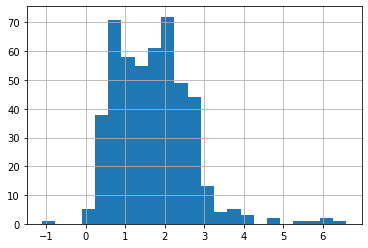

In [45]:
df_all_pff['ptsPerTouch'].hist(bins='auto')
df_all_pff['ptsPerTouch'].value_counts().sort_index()

In [46]:
df_all_pff.loc[df_all_pff['ptsPerTouch']==0.00]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
406,Melvin Ingram III,LAC,1,RB,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0.0,0.0,0,13.5,0.0,0.0,2018


In [47]:
df_all_pff.loc[df_all_pff['ptsPerTouch'].isna()]

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
16,Chris Lacy,DET,1,WR,1,0,0,0,0,0,0,0,0.0,10.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,1.7,0.0,NaN,2018
24,Malachi Dupre,ARZ,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,5.8,0.0,NaN,2018
31,Jaydon Mickens,JAX,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,27.9,0.0,NaN,2018
32,Max McCaffrey,SF,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,4.4,0.0,NaN,2018
33,Johnny Holton,OAK,1,WR,1,0,0,0,0,0,0,0,0.0,40.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,179.7,0.0,NaN,2018
35,Alonzo Russell,NYG,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,14.1,0.0,NaN,2018
37,Mose Frazier,CAR,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,8.0,0.0,NaN,2018
44,Bradley Marquez,DET,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,223.5,0.0,NaN,2018
74,Mike Wallace,PHI,2,WR,3,0,0,0,0,0,0,0,0.0,35.67,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,3.0,0.0,NaN,2018
80,Da'Mari Scott,BUF,1,WR,0,0,0,0,0,0,0,0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,35.4,0.0,NaN,2018


In [48]:
df_all_pff['ptsPerTouch'].fillna(0.00, inplace=True)

In [49]:
df_all_pff.isna().sum()

player             0
team               0
games              0
position           0
recTarg            0
recRec             0
recRec40s          0
recYds             0
recYds100Games     0
recTds             0
recTd40s           0
recDrops           0
catch              0
depth              0
ypt                0
ypr                0
rac                0
rushCarries        0
rush40s            0
rushYds            0
rushYds100Games    0
rushTds            0
rushTd40s          0
ypc                0
yac                0
rushTa             0
fantasyPts         0
ptsPerSnap         0
ptsPerTouch        0
year               0
dtype: int64

In [50]:
df_all_pff.dtypes


player              object
team                object
games                int64
position            object
recTarg              int64
recRec               int64
recRec40s            int64
recYds               int64
recYds100Games       int64
recTds               int64
recTd40s             int64
recDrops             int64
catch              float64
depth              float64
ypt                float64
ypr                float64
rac                float64
rushCarries          int64
rush40s              int64
rushYds              int64
rushYds100Games      int64
rushTds              int64
rushTd40s            int64
ypc                float64
yac                float64
rushTa               int64
fantasyPts         float64
ptsPerSnap         float64
ptsPerTouch        float64
year                 int64
dtype: object

### Clean PFF df to CSV

In [51]:
#Save nice clean PFF data to CSV
df_all_pff.to_csv('allpff.csv')

### Final PFF DataFrame

In [52]:
df_all_pff

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,14.6,0.10,3.52,2018
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,5.6,0.11,1.95,2018
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.0,0.25,2.53,2018
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,66.7,0.18,2.00,2018
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.0,0.27,2.56,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,John Phillips,ARZ,8,TE,3,3,0,38,0,0,0,0,100.0,10.00,12.67,12.67,2.67,0,0,0,0,0,0,0.00,0.00,0,207.8,0.04,1.77,2018
544,Jared Cook,OAK,16,TE,99,68,1,896,4,6,0,5,68.7,8.59,9.05,13.18,5.31,0,0,0,0,0,0,0.00,0.00,0,64.5,0.21,2.35,2018
545,Greg Olsen,CAR,9,TE,39,27,0,291,0,4,0,1,69.2,8.92,7.46,10.78,3.30,0,0,0,0,0,0,0.00,0.00,0,83.1,0.16,2.47,2018
546,Delanie Walker,TEN,1,TE,7,4,0,52,0,0,0,0,57.1,7.14,7.43,13.00,4.75,0,0,0,0,0,0,0.00,0.00,0,26.0,0.18,1.80,2018


## Football Outsiders (df_FO)

### FO Key / Abbreviations 

In [53]:
df_FO.head(1)

,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,BAL,27.5,31.8,47.4,21.1,27.6,48.4,20.5,7.4,-1.8



* DVOA: calculates a team's success based on the down-and-distance of each play during the season, then calculates how much more or less successful each team is compared to the league average.
* WEI: The WEIGHTED OFFENSE is adjusted so that earlier games in the season become gradually less important. It better reflects how the team was playing at the end of the season.


In [54]:
# realized don't need VAR and SCHED
#df_FO.drop(['VAR', 'SCHED'], axis=1, inplace=True)
df_FO.head(2)

,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,BAL,27.5,31.8,47.4,21.1,27.6,48.4,20.5,7.4,-1.8
1,DAL,24.0,21.2,39.3,8.7,24.2,41.0,6.9,3.8,-0.6


In [55]:
# Look-up team names for PFF
df_all_pff['team']

0      HST
1      JAX
2      CLV
3      CAR
4      ATL
      ... 
543    ARZ
544    OAK
545    CAR
546    TEN
547     NO
Name: team, Length: 546, dtype: object

In [56]:
# Match team names of PFF & Football Outsiders
df_FO['TEAM']

0     BAL
1     DAL
2      KC
3      NO
4     SEA
5     TEN
6      SF
7      GB
8     OAK
9     MIN
10     NE
11    LAC
12    ARI
13    PHI
14    ATL
15    LAR
16    HOU
17    DET
18    IND
19    CLE
20     TB
21    BUF
22    NYG
23    JAX
24    CHI
25    DEN
26    MIA
27    CAR
28    CIN
29    WAS
30    NYJ
31    PIT
Name: TEAM, dtype: object

### Match Team Names
* BLT, BAL
* ARZ, ARI
* LA, LAR
* CLV, CLE
* HST, HOU

In [57]:
df_FO['TEAM'].replace('BAL', 'BLT', inplace=True)

In [58]:
df_FO['TEAM'].replace('ARI', 'ARZ', inplace=True)

In [59]:
df_FO['TEAM'].replace('LAR', 'LA', inplace=True)

In [60]:
df_FO['TEAM'].replace('CLE', 'CLV', inplace=True)

In [61]:
df_FO['TEAM'].replace('HOU', 'HST', inplace=True)

In [62]:
df_FO.head(32)

,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,BLT,27.5,31.8,47.4,21.1,27.6,48.4,20.5,7.4,-1.8
1,DAL,24.0,21.2,39.3,8.7,24.2,41.0,6.9,3.8,-0.6
2,KC,22.7,20.8,43.7,-1.4,22.8,42.8,0.2,4.7,0.7
3,NO,21.3,27.8,43.7,-0.1,22.3,45.3,0.1,7.5,0.3
4,SEA,17.4,11.8,43.6,2.7,11.3,36.3,-2.4,10.1,-4.2
5,TEN,12.9,24.7,29.6,7.9,16.9,34.5,11.1,13.9,3.1
6,SF,7.2,4.4,24.4,-0.5,7.0,24.0,-0.6,6.8,-0.1
7,GB,6.5,4.1,17.1,8.3,5.5,15.1,8.9,6.9,0.4
8,OAK,5.6,3.1,24.9,-7.3,6.1,25.6,-7.1,8.4,1.2
9,MIN,4.6,2.7,18.2,-1.8,6.7,22.1,-1.5,5.9,2.6


In [63]:
df_all_pff.head(1)

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.2,0.8,0,0,0,0,0,0,0.0,0.0,0,14.6,0.1,3.52,2018


In [64]:
df_FO.head(1)

,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,BLT,27.5,31.8,47.4,21.1,27.6,48.4,20.5,7.4,-1.8


## Merge all Data (df)


In [65]:
#Merge
df = df_all_pff.merge(df_FO, how = 'left', left_on= 'team', right_on= 'TEAM')
df

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,TEAM,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,14.6,0.10,3.52,2018,HST,0.3,-2.8,13.6,0.0,1.5,11.8,5.0,9.2,0.1
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,5.6,0.11,1.95,2018,JAX,-9.5,-16.1,0.1,-14.6,-8.8,1.0,-13.9,9.0,2.6
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.0,0.25,2.53,2018,CLV,-4.6,-1.2,1.9,0.5,-7.6,-1.6,-2.2,9.0,-4.7
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,66.7,0.18,2.00,2018,CAR,-14.4,-20.1,-20.9,2.4,-17.1,-22.8,-1.6,7.1,-0.6
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.0,0.27,2.56,2018,ATL,2.0,2.9,16.3,-10.5,0.5,14.0,-10.6,7.2,-1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,John Phillips,ARZ,8,TE,3,3,0,38,0,0,0,0,100.0,10.00,12.67,12.67,2.67,0,0,0,0,0,0,0.00,0.00,0,207.8,0.04,1.77,2018,ARZ,3.8,9.8,1.2,15.5,1.1,-3.8,16.0,10.9,-2.6
542,Jared Cook,OAK,16,TE,99,68,1,896,4,6,0,5,68.7,8.59,9.05,13.18,5.31,0,0,0,0,0,0,0.00,0.00,0,64.5,0.21,2.35,2018,OAK,5.6,3.1,24.9,-7.3,6.1,25.6,-7.1,8.4,1.2
543,Greg Olsen,CAR,9,TE,39,27,0,291,0,4,0,1,69.2,8.92,7.46,10.78,3.30,0,0,0,0,0,0,0.00,0.00,0,83.1,0.16,2.47,2018,CAR,-14.4,-20.1,-20.9,2.4,-17.1,-22.8,-1.6,7.1,-0.6
544,Delanie Walker,TEN,1,TE,7,4,0,52,0,0,0,0,57.1,7.14,7.43,13.00,4.75,0,0,0,0,0,0,0.00,0.00,0,26.0,0.18,1.80,2018,TEN,12.9,24.7,29.6,7.9,16.9,34.5,11.1,13.9,3.1


In [66]:
df.drop('TEAM' , axis=1, inplace=True)

## Scaling

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 39 columns):
player             546 non-null object
team               546 non-null object
games              546 non-null int64
position           546 non-null object
recTarg            546 non-null int64
recRec             546 non-null int64
recRec40s          546 non-null int64
recYds             546 non-null int64
recYds100Games     546 non-null int64
recTds             546 non-null int64
recTd40s           546 non-null int64
recDrops           546 non-null int64
catch              546 non-null float64
depth              546 non-null float64
ypt                546 non-null float64
ypr                546 non-null float64
rac                546 non-null float64
rushCarries        546 non-null int64
rush40s            546 non-null int64
rushYds            546 non-null int64
rushYds100Games    546 non-null int64
rushTds            546 non-null int64
rushTd40s          546 non-null int64
ypc     

In [68]:
df['player'].nunique()

546

In [69]:
df[df['RUSHOFF'].isna()]['team'].value_counts()

Series([], Name: team, dtype: int64)

In [70]:
#Number cols to scale
number_cols = df.select_dtypes('number').columns
number_cols

Index(['games', 'recTarg', 'recRec', 'recRec40s', 'recYds', 'recYds100Games',
       'recTds', 'recTd40s', 'recDrops', 'catch', 'depth', 'ypt', 'ypr', 'rac',
       'rushCarries', 'rush40s', 'rushYds', 'rushYds100Games', 'rushTds',
       'rushTd40s', 'ypc', 'yac', 'rushTa', 'fantasyPts', 'ptsPerSnap',
       'ptsPerTouch', 'year', 'OFFENSEDVOA', 'WEI.OFFENSE', 'PASSOFF',
       'RUSHOFF', 'NON-ADJTOTAL', 'NON-ADJPASS', 'NON-ADJRUSH', 'VAR',
       'SCHED'],
      dtype='object')

In [71]:
df.head()

,player,team,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
0,Vyncint Smith,HST,6,WR,9,5,0,91,0,1,0,1,55.6,23.33,10.11,18.20,0.80,0,0,0,0,0,0,0.00,0.00,0,14.6,0.10,3.52,2018,0.3,-2.8,13.6,0.0,1.5,11.8,5.0,9.2,0.1
1,Keelan Cole,JAX,16,WR,64,38,0,491,1,1,0,6,59.4,10.19,7.67,12.92,3.63,0,0,0,0,0,0,0.00,0.00,0,5.6,0.11,1.95,2018,-9.5,-16.1,0.1,-14.6,-8.8,1.0,-13.9,9.0,2.6
2,Derrick Willies,CLV,4,WR,5,3,0,61,0,0,0,0,60.0,11.80,12.20,20.33,11.00,0,0,0,0,0,0,0.00,0.00,0,0.0,0.25,2.53,2018,-4.6,-1.2,1.9,0.5,-7.6,-1.6,-2.2,9.0,-4.7
3,D.J. Moore,CAR,16,WR,76,54,3,781,1,2,1,4,71.1,9.62,10.28,14.46,7.91,13,0,172,0,0,0,13.23,7.77,6,66.7,0.18,2.00,2018,-14.4,-20.1,-20.9,2.4,-17.1,-22.8,-1.6,7.1,-0.6
4,Calvin Ridley,ATL,16,WR,91,64,4,821,1,10,3,8,70.3,10.38,9.02,12.83,5.73,5,0,24,0,0,0,4.80,3.00,1,0.0,0.27,2.56,2018,2.0,2.9,16.3,-10.5,0.5,14.0,-10.6,7.2,-1.4


### Scale Data

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [73]:
scaler = StandardScaler()

In [74]:
df[number_cols] = scaler.fit_transform(df[number_cols])


In [75]:
df.describe().round(3)

,games,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED
count,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.0,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000,546.000
mean,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.0,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.0,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.929,-0.848,-0.839,-0.459,-0.765,-0.323,-0.657,-0.350,-0.749,-2.135,-1.803,-1.679,-1.571,-1.381,-0.403,-0.205,-0.445,-0.235,-0.336,-0.142,-3.685,-1.862,-0.382,-0.812,-1.327,-2.500,0.0,-1.850,-2.236,-1.659,-2.118,-1.683,-1.729,-2.110,-1.613,-2.105
25%,-0.933,-0.763,-0.759,-0.459,-0.703,-0.323,-0.657,-0.350,-0.749,-0.221,-0.937,-0.514,-0.467,-0.667,-0.403,-0.205,-0.397,-0.235,-0.336,-0.142,-0.596,-0.705,-0.382,-0.757,-0.586,-0.749,0.0,-0.712,-0.574,-0.578,-0.660,-0.648,-0.668,-0.572,-0.570,-0.498
50%,0.157,-0.366,-0.398,-0.459,-0.428,-0.323,-0.231,-0.350,-0.229,0.234,-0.040,0.114,0.049,-0.079,-0.403,-0.205,-0.397,-0.235,-0.336,-0.142,-0.596,-0.705,-0.382,-0.413,-0.153,-0.016,0.0,0.061,-0.045,0.024,0.135,-0.002,0.026,0.155,-0.171,0.099
75%,0.915,0.398,0.393,0.446,0.249,-0.323,0.196,-0.350,0.290,0.620,0.645,0.601,0.550,0.602,-0.287,-0.205,-0.269,-0.235,-0.336,-0.142,0.566,0.643,-0.257,0.424,0.403,0.651,0.0,0.455,0.353,0.693,0.476,0.486,0.677,0.435,0.382,0.696
max,1.104,3.852,4.169,6.782,4.620,8.046,5.744,6.484,4.964,1.308,5.210,4.535,6.572,5.306,5.474,13.567,5.776,8.306,8.133,13.344,5.301,5.663,5.244,5.308,11.527,4.858,0.0,2.083,2.256,1.907,2.425,2.100,1.956,2.327,3.145,1.660


## One Hot Encoding

In [76]:
categ_cols = ['team']

In [77]:
#make categorical / One Hot Encoding

df2 = pd.get_dummies(df, columns= categ_cols)
df2.head(2)

,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,Vyncint Smith,-0.791235,WR,-0.592887,-0.638748,-0.459191,-0.473049,-0.323437,-0.230589,-0.350486,-0.229218,-0.220626,2.612021,0.93864,1.516751,-1.142808,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.594997,-0.400121,1.914628,0.0,0.061166,-0.120435,0.167810,0.428336,0.140707,0.062114,0.882407,0.443372,0.099067,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Keelan Cole,1.104395,WR,0.964395,0.683513,-0.459191,0.811374,0.513513,-0.230589,-0.350486,2.367317,-0.089783,0.564261,0.30681,0.621097,-0.301798,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.728954,-0.338320,0.414338,0.0,-0.667432,-1.033926,-0.526899,-0.953559,-0.632509,-0.496826,-0.879471,0.381977,1.247004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## get_group WR (df_wr)

In [78]:
df_wr =df2.groupby('position').get_group('WR')
df_wr


,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
0,Vyncint Smith,-0.791235,WR,-0.592887,-0.638748,-0.459191,-0.473049,-0.323437,-0.230589,-0.350486,-0.229218,-0.220626,2.612021,0.938640,1.516751,-1.142808,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.594997,-0.400121,1.914628,0.0,0.061166,-0.120435,0.167810,0.428336,0.140707,0.062114,0.882407,0.443372,0.099067,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Keelan Cole,1.104395,WR,0.964395,0.683513,-0.459191,0.811374,0.513513,-0.230589,-0.350486,2.367317,-0.089783,0.564261,0.306810,0.621097,-0.301798,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.728954,-0.338320,0.414338,0.0,-0.667432,-1.033926,-0.526899,-0.953559,-0.632509,-0.496826,-0.879471,0.381977,1.247004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Derrick Willies,-1.170360,WR,-0.706144,-0.718885,-0.459191,-0.569381,-0.323437,-0.657373,-0.350486,-0.748525,-0.069123,0.815166,1.479840,1.878066,1.888395,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.812306,0.526892,0.968585,0.0,-0.303133,-0.010542,-0.434271,0.475661,-0.542425,-0.631386,0.211216,0.381977,-2.104971,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,D.J. Moore,1.104395,WR,1.304165,1.324609,2.256167,1.742581,0.513513,0.196196,1.358135,1.328703,0.313077,0.475431,0.982661,0.882329,0.970119,-0.151759,-0.205396,0.343100,-0.234625,-0.335771,-0.142027,3.119262,3.793424,0.367949,0.180469,0.094286,0.462118,0.0,-1.031731,-1.308660,-1.607558,0.655497,-1.255586,-1.728564,0.267148,-0.201277,-0.222355,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Calvin Ridley,1.104395,WR,1.728879,1.725294,3.161286,1.871023,0.513513,3.610471,4.775377,3.405930,0.285531,0.593871,0.656388,0.605830,0.322274,-0.306422,-0.205396,-0.294013,-0.234625,-0.335771,-0.142027,0.752051,1.032112,-0.257129,-0.812306,0.650494,0.997253,0.0,0.187555,0.271061,0.306752,-0.565492,0.065638,0.175972,-0.571841,-0.170580,-0.589695,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Pierre Garcon,-0.412109,WR,0.313168,0.122554,-0.459191,0.153107,-0.323437,-0.230589,-0.350486,1.328703,-0.120772,0.458289,0.128136,0.451465,-0.153209,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,0.113491,-0.276519,0.404782,0.0,0.574158,0.374086,0.723578,0.381011,0.553590,0.693509,0.360369,-0.293370,0.007232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
234,Matthew Slater,-0.601672,WR,-0.847715,-0.839090,-0.459191,-0.765255,-0.323437,-0.657373,-0.350486,-0.748525,-2.135071,-1.023766,-1.679314,-1.570542,-1.380550,-0.403087,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,1.612328,-1.018130,-1.449080,0.0,0.343683,0.030669,0.234708,0.153850,0.471013,0.398513,0.155283,-0.477556,0.695994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
235,DeSean Jackson,0.346143,WR,1.190909,0.803718,4.066406,1.720104,2.187413,1.049764,4.775377,0.290089,-0.175864,2.027615,1.104366,1.632100,-0.096746,-0.2870

## get_group RB (df_rb)

In [79]:
df_rb =df2.groupby('position').get_group('RB')
df_rb


,player,games,position,recTarg,recRec,recRec40s,recYds,recYds100Games,recTds,recTd40s,recDrops,catch,depth,ypt,ypr,rac,rushCarries,rush40s,rushYds,rushYds100Games,rushTds,rushTd40s,ypc,yac,rushTa,fantasyPts,ptsPerSnap,ptsPerTouch,year,OFFENSEDVOA,WEI.OFFENSE,PASSOFF,RUSHOFF,NON-ADJTOTAL,NON-ADJPASS,NON-ADJRUSH,VAR,SCHED,team_ARZ,team_ATL,team_BLT,team_BUF,team_CAR,team_CHI,team_CIN,team_CLV,team_DAL,team_DEN,team_DET,team_GB,team_HST,team_IND,team_JAX,team_KC,team_LA,team_LAC,team_MIA,team_MIN,team_NE,team_NO,team_NYG,team_NYJ,team_OAK,team_PHI,team_PIT,team_SEA,team_SF,team_TB,team_TEN,team_WAS
238,Trenton Cannon,0.535706,RB,-0.111546,-0.157926,-0.459191,-0.302863,-0.323437,-0.657373,-0.350486,1.328703,0.116812,-0.046638,-0.244748,-0.133763,0.785869,0.331562,-0.205396,0.089116,-0.234625,0.162411,-0.142027,0.238172,0.817923,0.742996,1.418834,0.341490,-0.751493,0.0,-1.819806,-1.157556,-1.659018,-1.786482,-1.578385,-1.474971,-1.476086,1.947555,0.190902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
239,Nyheim Hines,1.104395,RB,1.360794,1.685226,-0.459191,0.599445,-0.323437,0.196196,-0.350486,1.328703,0.647072,-0.632603,-0.268053,-0.425530,0.224205,1.240207,-0.205396,0.950079,-0.234625,0.660593,-0.142027,0.437546,0.632677,0.367949,0.189400,0.588693,-0.617709,0.0,-0.191613,-0.560010,-0.655549,0.570312,-0.001925,-0.507177,0.770542,-0.170580,1.660261,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240,Jaylen Samuels,0.156580,RB,-0.026603,0.202691,-0.459191,-0.126255,-0.323437,0.622980,-0.350486,-0.748525,0.953520,-1.050259,0.097062,-0.272861,1.145453,0.679554,-0.205396,0.704705,0.985424,-0.335771,-0.142027,0.687465,0.817923,-0.007098,-0.749792,1.083101,-0.560373,0.0,-1.849545,-2.235887,-1.473762,-1.701296,-1.683482,-1.262781,-1.662528,-1.122206,-0.360107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
241,Gus Edwards,0.156580,RB,-0.791087,-0.758953,-0.459191,-0.701034,-0.323437,-0.657373,-0.350486,-0.748525,1.308175,-0.790003,0.910156,0.125773,1.145453,2.245516,1.762085,2.693529,3.425521,0.660593,-0.142027,0.875606,1.159469,2.493215,-0.330058,0.835897,-0.856609,0.0,2.083397,2.256014,1.907157,2.425458,2.100022,1.956299,2.327334,-0.109185,-0.773365,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
242,Mark Walton,-0.222546,RB,-0.649516,-0.638748,-0.459191,-0.633602,-0.323437,-0.657373,-0.350486,-0.229218,0.323407,-1.290255,-0.161885,-0.179564,1.412913,-0.132427,-0.205396,-0.250964,-0.234625,-0.335771,-0.142027,0.086536,0.372176,-0.382145,0.242983,-0.338320,-0.942613,0.0,-1.187859,-0.999584,-1.195878,-0.489772,-1.428246,-1.480146,-0.478620,-0.324068,-1.691714,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Nick Bellore,0.725269,RB,-0.734458,-0.678816,-0.459191,-0.717089,-0.323437,-0.657373,-0.350486,-0.748525,1.308175,-0.984805,-0.708263,-0.934424,-0.340431,-0.383754,-0.205396,-0.397328,-0.234625,-0.335771,-0.142027,-0.595827,-0.704562,-0.382145,-0.812306,-0.832728,-0.780161,0.0,-0.176744,-0.353959,0.147226,-0.811583,-0.354752,0.025886,-1.019302,-0.938020,-0.268272,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407,Anthony Sherman,1.104395,RB,-0.592887,-0.518542,-0.459191,-0.456994,-0.323437,-0.230589,-0.350486,-0.229218,0.925974,-0.331829,1.083651,0.465036,0.812615,-0.383754,-0.205396,-0.388719,-0.234625,-0.335771,-0.142027,-0.034211,-0.125670,-0.382145,-0.791468,0.217888,0.653238,0.0,1.726532,1.500496,1.716755,0.295826,1.739688,1.666479,0.434946,-0.938020,0.374572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
408,James Develin,1.104395,RB,-0.366374,-0.358268,-0.459191,-0.569381,-0.323437,-0.657373,-0.350486,-0.748525,0.295861,-0.674680,-0.

# MODELS

## Functions

In [80]:
def evaluate_model(X_test, y_test, model):

    from sklearn.tree import DecisionTreeRegressor 
    from sklearn.metrics import r2_score, mean_squared_error

    # Make predictions for test data
    y_pred = model.predict(X_test)

    # Calculate r2
    y_true = y_test
    r2 = r2_score(y_true, y_pred)
    print('r2 is :{0}'.format(round(r2, 4)))
    
    #Calculate MSE
    y_true = y_test
    mse = mean_squared_error(y_true,y_pred)  
    print('MSE is :{0}'.format(round(mse, 4)))

In [81]:
y =df_rb['fantasyPts'].copy()

In [82]:
drop_cols= ['player', 'position', 'fantasyPts']

In [83]:
X = df_rb.drop(columns=drop_cols).copy()

In [84]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

## Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sort = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)
    sort.plot(kind ='barh')
 
    plt.title('Feature Importance')
    plt.ylabel('Feature')
    
    plt.show()
    
    return sort

def get_corr(df, model):
    sort = plot_feature_importances(model)
    
    fig, ax = plt.subplots(figsize=(5,5))
    
    df_corr = df.corr()['fantasyPts']
    df_corr.loc[sort.index].plot(kind='barh', ax=ax)
    ax.set_xlabel('Correlation with Fantasy Points', fontdict=dict(size=12))
           
    ax.set_title('Correlation of Most Important Features', fontdict=dict(size=14))
    ax.axvline(0.0)
    plt.show()
    
    #return fig

In [87]:
lin_reg = LinearRegression()

In [88]:
lin_reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### RB lin_reg

#### RB Evaluate Model

In [89]:
evaluate_model(X_test, y_test, lin_reg)

r2 is :-0.7276
MSE is :2.6068


#### Cross Validation

In [90]:
X_train.shape

(138, 67)

In [91]:
lin_reg.coef_

array([-0.30079392, -2.56698244,  2.75781507, -0.24354691, -0.90044   ,
        0.58426254, -0.37319558,  0.86560063,  0.03695194,  0.1701294 ,
       -0.3421707 , -0.89187026,  1.14732985, -0.32879497,  0.54361492,
       -0.14463982, -0.42086089,  0.03860952,  0.11392491,  0.04451886,
        0.08856255,  0.55414096, -0.10099138, -0.09632324,  0.1158303 ,
        0.        , -0.01112508,  0.0881427 ,  0.09363829, -0.0988242 ,
       -0.1235006 , -0.17076886,  0.20049928, -0.00377652, -0.02724987,
       -0.92927362,  0.63437684,  0.07617468,  0.12176074,  0.33438012,
       -0.43030508,  0.56758597,  0.19555491, -0.17244868,  1.36690061,
        0.62117399, -0.70162807,  0.46236018, -0.18884421, -0.29608622,
       -0.15664163,  0.14078908, -0.47567259,  0.18307684,  0.35606159,
       -0.91530042, -0.40825383, -0.24493822,  0.09616043,  0.58695793,
        1.37614336, -1.09050495, -0.00298015, -0.01950809, -0.54327911,
        0.08601281, -0.62980518])

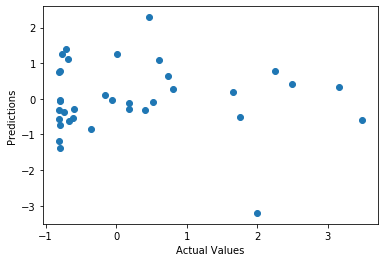

In [92]:
y_pred = lin_reg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict


cv_5_results = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')

In [94]:
cv_5_results

array([-1.82043282, -1.41557691, -0.34616742, -1.3668214 , -3.16952601])

In [95]:
y_hat_test = cross_val_predict(lin_reg, X, y, cv=5)

In [96]:
y_hat_test

array([-1.13013923e+00,  1.32777232e+00, -7.19545733e-01, -1.69077225e-01,
        9.67496854e-01,  9.33932955e-02,  2.04444331e+00, -6.11214484e-02,
        2.39818470e+00,  7.80219430e-01,  1.65692557e+00,  7.40138701e-01,
        1.14380885e-03,  5.26007864e-01,  9.20137748e-01, -6.41675828e-01,
        1.92728452e+00,  1.11051466e+00,  1.36943886e+00, -1.26735341e-01,
       -1.61410241e-01,  1.66826502e-01,  1.03512170e+00,  7.64458240e-03,
        1.35700484e+00,  2.64922954e-01,  1.16322375e+00,  4.42495157e-01,
       -2.46480101e-02,  1.78928228e-01,  2.27276109e+00,  6.77278353e-01,
        2.91239688e+00,  1.28546726e+00,  4.37248029e-01,  3.30519508e-01,
       -3.31746070e-01,  9.38271690e-01,  6.40427711e-01, -8.87172409e-01,
       -3.16197815e-02,  1.90123106e+00,  9.72611074e-01,  2.45954625e-02,
       -6.71902197e-01, -1.03700133e+00,  2.40838931e+00,  3.30542051e-01,
       -1.25880532e+00,  6.92024956e-01,  6.82797640e-02,  4.08206777e+00,
        1.53499194e+00, -

In [97]:
xplot = list(range(len(y)))

In [98]:
len(y_hat_test), len(y)

(173, 173)

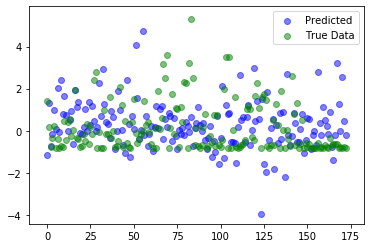

In [99]:
fig, ax=plt.subplots()

ax.scatter(xplot, y_hat_test, color='blue', alpha=.5, marker='o', label="Predicted")

ax.scatter(xplot, y, color='green', alpha=.5, label='True Data')
ax.legend()

#### Feature Values & Corr Matrix

In [100]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(lin_reg.predict,X_test)
rf_shap_values = explainer.shap_values(X_test)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) t

//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) t

//anaconda3/envs/learn-env/lib/python3.6/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


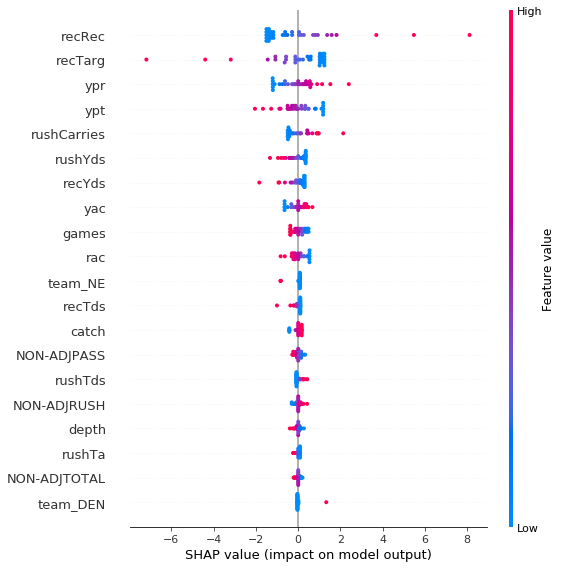

In [101]:
shap.summary_plot(rf_shap_values, X_test)

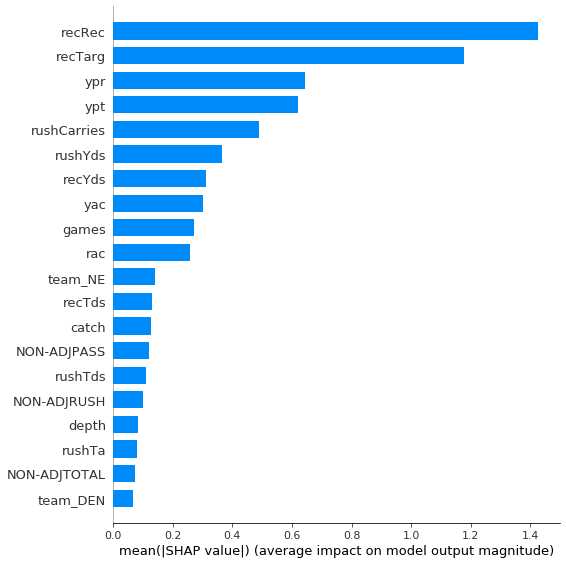

In [102]:
shap.summary_plot(rf_shap_values, X_test, plot_type='bar')

In [103]:
# plot the SHAP values for the 10th observation 
shap.force_plot(explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:])

## Decesion Tree

### RBs Decesion Tree

In [104]:
# import for Regressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
# Train Decesion Tree regression
dtree = DecisionTreeRegressor()  
dtree.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [106]:
# Make predictions for test data
y_pred = dtree.predict(X_test)

#### RB Evaluate Model

In [107]:
evaluate_model(X_test, y_test, dtree)

r2 is :-0.8101
MSE is :2.7313


#### Feature Values & Corr Matrix

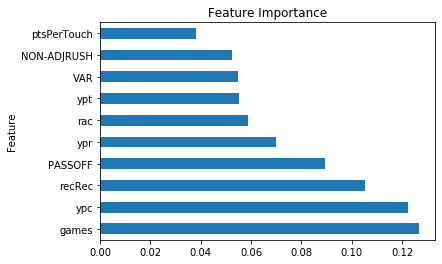

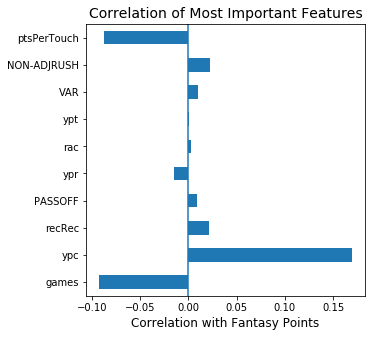

In [108]:
get_corr(df_rb, dtree)

## WRs Decision Tree

### Evaluate Model

### Features Value & Corr Matrix

## Random Forest

In [109]:
#imports

from sklearn.ensemble import RandomForestRegressor 

### RB

In [110]:
# create regressor object 
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 10) 
  
# fit the regressor with X and y data 
rf_reg.fit(X_train, y_train)   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

#### Evaluate Model

In [111]:
evaluate_model(X_test, y_test, rf_reg)

r2 is :-0.1377
MSE is :1.7167
